## 1. Find an example problem to test the root finding algorithms
## 2. Implement Newton method
## 3. Implement Bisection method
## 4. Compare results (number of iterations and execution time)

## The function I chose: f(x) = x - cos(x)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [64]:
#2 Newton method

def func(x):
    return x - np.cos(x)

def derivfunc(x):
    return 1 + np.sin(x)

def newton(f, df, a):
    # Counting number of iterations
    i = 0
    total = 0

    # While the absolute result of the function is more than allowed toleration
    while abs(f(a)) > 1.0e-8:
        if df(a) == 0 : break # If deriv function results 0, break
        
        # Newton's general function
        a1 = a - f(a) / df(a) 
        a = a1 # Replace a
        
        i += 1
        total = i # Get total number of iteration at the end of func
        
        # Anticipation for infinite loop
        if total > 100: 
            print("Program terminated at 100 iterations")
            break
            
    print(f'The total number of iterations are {total}')
    return a1

def newton2(f, a):
    i = 0
    total = 0
    h = 1.0e-8
    
    df = lambda a : (f(a + h) - f(a - h)) / (2 * h)

    # While the absolute result of the function is more than allowed toleration
    while abs(f(a)) > 1.0e-8:
        if df(a) == 0 : break 
        
        # Newton's general function
        a1 = a - f(a) / df(a)
        a = a1 
        
        i += 1
        total = i 
        
        # Anticipation for infinite loop
        if total >= 100: 
            print("Program terminated at 100 iterations")
            break
            
    print(f'The total number of iterations are {total}')
    return a1

xvalue = 50

startNewton = time.time()
newtonResult = newton(func, derivfunc, xvalue)
endNewton = time.time()
timeNewton = endNewton - startNewton

startNewton2 = time.time()
newtonResult2 = newton2(func, xvalue)
endNewton2 = time.time()
timeNewton2 = endNewton2 - startNewton2

print(f'The root using newton\'s method with the x value of {xvalue} is {newtonResult}')
print(f'The root using newton\'s method using finite difference approximation with the x value of {xvalue} is {newtonResult2}')
print("Using Newton method where user input both function and derivative of the function takes less iteration, however \
both value is almost identical, identical to the 8th significant value.")

The total number of iterations are 36
The total number of iterations are 44
The root using newton's method with the x value of 50 is 0.7390851332151679
The root using newton's method using finite difference approximation with the x value of 50 is 0.7390851334955562
Using Newton method where user input both function and derivative of the function takes less iteration, however both value is almost identical, identical to the 8th significant value.


In [60]:
# 3 Bisection method

def func(x):
    return x - np.cos(x)

def bisecRoot(a, b, f): 
    i = 0
    
    if f(a) * f(b) >= 0:
        return "Please enter another number"
    
    while True:
        mid = (a+b) / 2 # Find the midpoint
     
        # If left function multiplied by mid function less than 0, change right function to mid
        if f(a) * f(mid) < 0:
            b = mid
            
        # Else change left function to mid
        else:
            a = mid
            
        i += 1
        total = i
        
        # Stop loop if mid is less than allowed toleration
        if abs(f(mid)) < 1.0e-8:
            break;
            
        # Anticipation for infinite loop
        if total > 100: 
            print("Program terminated at 100 iterations")
            break
        
    print(f'The total number of iterations are {total}')
    return mid

value1 = 0
value2 = 100

startBisect = time.time()
bisectResult = bisecRoot(value1, value2, func)
endBisect = time.time()
timeBisect = endBisect - startBisect
print(f'The root using Biesction method with the values of {value1} and {value2} is {bisectResult}')

The total number of iterations are 32
The root using Biesction method with the values of 0 and 100 is 0.7390851387754083


The time taken to execute using Newton's method with 2 parameters is 0.0019457340240478516
The time taken to execute using Newton's method using finite difference approximation is 0.0029916763305664062
The time taken to execute using Bisection method is 0.0009984970092773438
The Newton's method using finite difference approximation take a bit more time to execute than Newton's method.
Bisection takes less more time to execute compared to Newton at this execution time, however both are on par and fast. At some runtime, bisection method takes a bit more time than newton's

The total number of iterations are 36
The total number of iterations are 44
The total number of iterations are 32
Using Bisection method has less iterations compared to Newton's, with almost the same root value


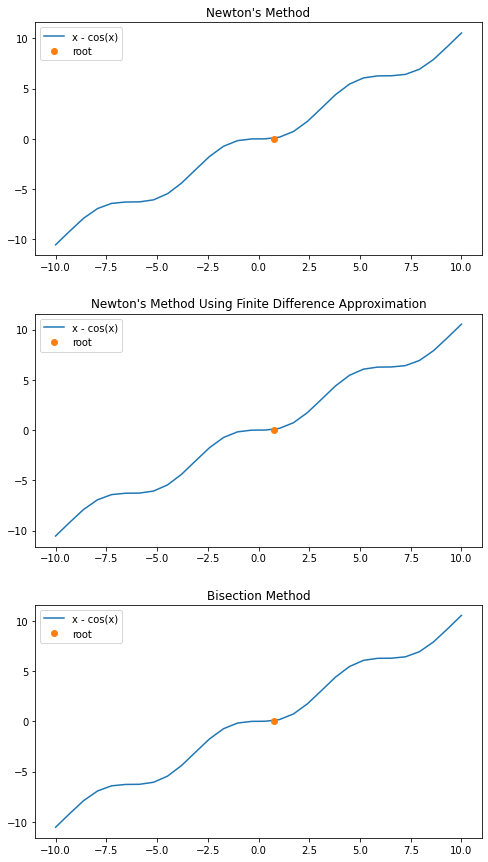

In [67]:
# 4 Comparing both methods

# Comparing time executed
print(f'The time taken to execute using Newton\'s method with 2 parameters is {timeNewton}')
print(f'The time taken to execute using Newton\'s method using finite difference approximation is {timeNewton2}')
print(f'The time taken to execute using Bisection method is {timeBisect}')
print("The Newton's method using finite difference approximation take a bit more time to execute than Newton's method.")
print("Bisection takes less more time to execute compared to Newton at this execution time, \
however both are on par and fast. At some runtime, bisection method takes a bit more time than newton's\n")

# Plotting graph
fig = plt.figure(figsize=(8, 15))
fig.subplots_adjust(hspace=.25)
randomData = np.linspace(-10, 10, 30)

ax = fig.add_subplot(3,1,1)
ax.plot(randomData, (randomData - np.sin(randomData)), label="x - cos(x)")
ax.plot(newton(func, derivfunc, 50), 0, 'o', label="root")
ax.set_title("Newton's Method")
plt.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.plot(randomData, (randomData - np.sin(randomData)), label="x - cos(x)")
ax2.plot(newton2(func, 50), 0, 'o', label="root")
ax2.set_title("Newton's Method Using Finite Difference Approximation")
plt.legend()

ax3 = fig.add_subplot(3,1,3)
ax3.plot(randomData, (randomData - np.sin(randomData)), label="x - cos(x)")
ax3.plot(bisecRoot(0, 100, func), 0, 'o', label="root")
ax3.set_title("Bisection Method")
plt.legend()

# Comparing Iterations
print("Using Bisection method has less iterations compared to Newton's, with almost the same root value")